In [21]:
import pandas as pd
import numpy as np

# **1. Dataset Selection and Exploration**

In [22]:
# Read data transactions
transaction = pd.read_csv('transactions.csv')
transaction.head()

,Transaction ID,Timestamp,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,4d3db980-46cd-4158-a812-dcb77055d0d2,2024-06-22 04:06:38,Tiya Mall,4161803452@okaxis,Mohanlal Golla,7776849307@okybl,3907.34,FAILED
1,099ee548-2fc1-4811-bf92-559c467ca792,2024-06-19 06:04:49,Mohanlal Bakshi,8908837379@okaxis,Mehul Sankaran,7683454560@okaxis,8404.55,SUCCESS
2,d4c05732-6b1b-4bab-90b9-efe09d252b99,2024-06-04 04:56:09,Kismat Bora,4633654150@okybl,Diya Goel,2598130823@okicici,941.88,SUCCESS
3,e8df92ee-8b04-4133-af5a-5f412180c8ab,2024-06-09 09:56:07,Ayesha Korpal,7018842771@okhdfcbank,Rhea Kothari,2246623650@okaxis,8926.00,SUCCESS
4,e7d675d3-04f1-419c-a841-7a04662560b7,2024-06-25 08:38:19,Jivin Batta,1977143985@okybl,Baiju Issac,5245672729@okybl,2800.55,SUCCESS


In [23]:
# Statistik deskriptif
print(transaction.describe())

       Amount (INR)
count   1000.000000
mean    4999.022930
std     2873.484534
min       28.520000
25%     2521.620000
50%     4951.435000
75%     7315.835000
max     9993.060000


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Aspire 3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


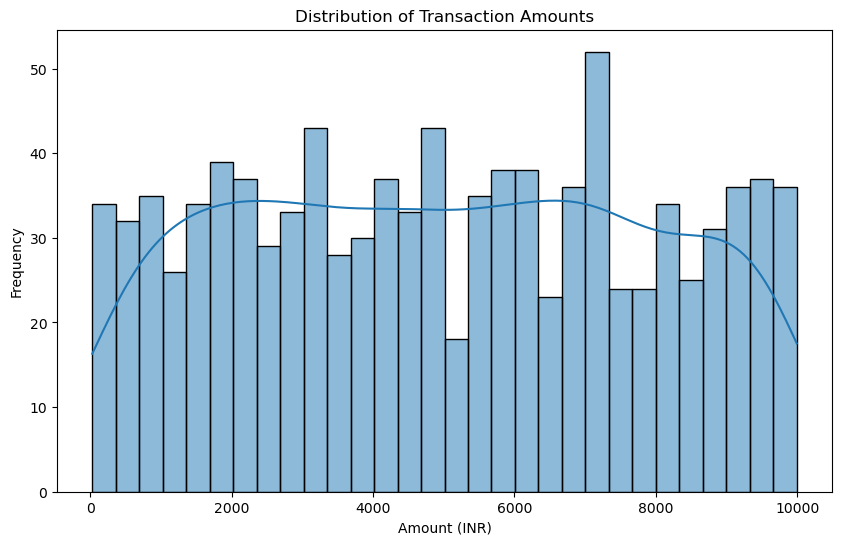

In [25]:
# Distribution of Amounts
plt.figure(figsize=(10, 6))
sns.histplot(transaction['Amount (INR)'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.show()

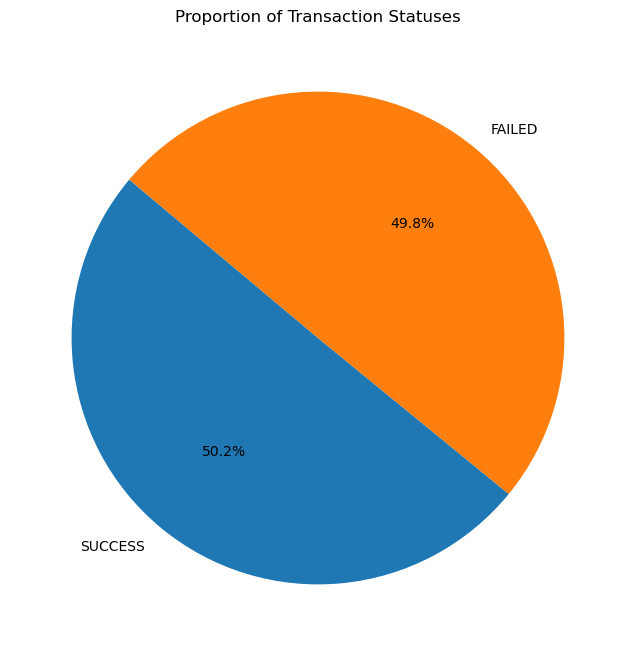

In [26]:
# Status Proportions
status_counts = transaction['Status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Transaction Statuses')
plt.show()

# **2. Prepocessing Data**

In [27]:
# Check missing value
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction ID   1000 non-null   object 
 1   Timestamp        1000 non-null   object 
 2   Sender Name      1000 non-null   object 
 3   Sender UPI ID    1000 non-null   object 
 4   Receiver Name    1000 non-null   object 
 5   Receiver UPI ID  1000 non-null   object 
 6   Amount (INR)     1000 non-null   float64
 7   Status           1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [28]:
# Checking Null or Missing data
transaction.isna().sum()

Transaction ID     0
Timestamp          0
Sender Name        0
Sender UPI ID      0
Receiver Name      0
Receiver UPI ID    0
Amount (INR)       0
Status             0
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [30]:
# Encode categorical variables
label_encoder = LabelEncoder()
transaction['Sender Name'] = label_encoder.fit_transform(transaction['Sender Name'])
transaction['Sender UPI ID'] = label_encoder.fit_transform(transaction['Sender UPI ID'])
transaction['Receiver Name'] = label_encoder.fit_transform(transaction['Receiver Name'])
transaction['Receiver UPI ID'] = label_encoder.fit_transform(transaction['Receiver UPI ID'])
transaction['Status'] = label_encoder.fit_transform(transaction['Status'])

In [31]:
# Scale numerical features
scaler = StandardScaler()
transaction['Amount (INR)'] = scaler.fit_transform(transaction[['Amount (INR)']])

In [32]:
# Drop the original Timestamp and Transaction ID column
transaction.drop(columns=['Timestamp', 'Transaction ID'], inplace=True)

In [33]:
transaction.head()

,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR),Status
0,891,445,552,787,-0.380106,0
1,529,899,535,769,1.185749,1
2,448,490,239,252,-1.412631,1
3,131,709,711,208,1.367309,1
4,389,221,155,527,-0.765472,1


# **3.  Model Training and Comparison**

In [34]:
# Define features and target variable
X = transaction.drop(columns=['Status'])
y = transaction['Status']

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
X_train

,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR)
541,243,623,83,214,0.681628
440,410,812,346,636,0.086241
482,722,533,17,3,0.360568
422,444,220,955,987,-1.318402
778,536,556,798,65,0.097369
...,...,...,...,...,...
106,692,153,751,707,0.697474
270,105,36,528,55,1.474344
860,708,520,673,536,0.990686
435,47,257,470,410,-1.052498


In [37]:
X_test

,Sender Name,Sender UPI ID,Receiver Name,Receiver UPI ID,Amount (INR)
521,183,271,134,860,0.618359
737,695,63,98,541,-0.119292
740,130,820,542,503,0.449730
660,877,668,744,45,0.426486
411,667,787,106,372,0.266871
...,...,...,...,...,...
468,74,334,970,858,0.570581
935,676,307,872,450,1.614850
428,541,162,301,482,0.132570
7,785,830,885,950,-0.111040


In [38]:
y_train

541    0
440    1
482    0
422    0
778    1
      ..
106    1
270    1
860    1
435    1
102    0
Name: Status, Length: 700, dtype: int32

In [39]:
y_test

521    1
737    0
740    1
660    1
411    0
      ..
468    0
935    0
428    0
7      0
155    0
Name: Status, Length: 300, dtype: int32

# **Logistic Regression**

In [40]:
# Normalisasi fitur
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_test, y_test)

# predict the response values for the observations in X
logreg.predict(x_test)

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [43]:
# store the predicted response values
y_pred_logreg = logreg.predict(x_test)

# check how many predictions were generated
len(y_pred_logreg)

300

In [45]:
# Evaluate the model
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
report = classification_report(y_test, y_pred_logreg)
conf_matrix = confusion_matrix(y_test, y_pred_logreg)

print(f'Logistic Regression Accuracy: {logreg_accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Logistic Regression Accuracy: 0.5366666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.58      0.56       153
           1       0.53      0.50      0.51       147

    accuracy                           0.54       300
   macro avg       0.54      0.54      0.54       300
weighted avg       0.54      0.54      0.54       300

Confusion Matrix:
[[88 65]
 [74 73]]


# **KNN**

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_knn))

0.5


In [48]:
# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn)
conf_matrix = confusion_matrix(y_test, y_pred_knn)

print(f'KNN Accuracy: {knn_accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

KNN Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       153
           1       0.49      0.51      0.50       147

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Confusion Matrix:
[[75 78]
 [72 75]]


In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.5
Mean Squared Error (MSE): 0.5
Root Mean Squared Error (RMSE): 0.7071067811865476
R-squared (R²): -1.000800320128051


# **SVM**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
# Train the SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

In [53]:
# Make predictions
y_pred_svm = svm_model.predict(X_test_scaled)
y_pred_svm

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

In [54]:
# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
conf_matrix = confusion_matrix(y_test, y_pred_svm)
class_report = classification_report(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

SVM Accuracy: 0.49666666666666665
Confusion Matrix:
[[74 79]
 [72 75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.48      0.49       153
           1       0.49      0.51      0.50       147

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300



In [55]:
# Evaluate the model using regression metrics
mae = mean_absolute_error(y_test, y_pred_svm)
mse = mean_squared_error(y_test, y_pred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svm)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')

Mean Absolute Error (MAE): 0.5033333333333333
Mean Squared Error (MSE): 0.5033333333333333
Root Mean Squared Error (RMSE): 0.7094598884597587
R-squared (R²): -1.014138988928905


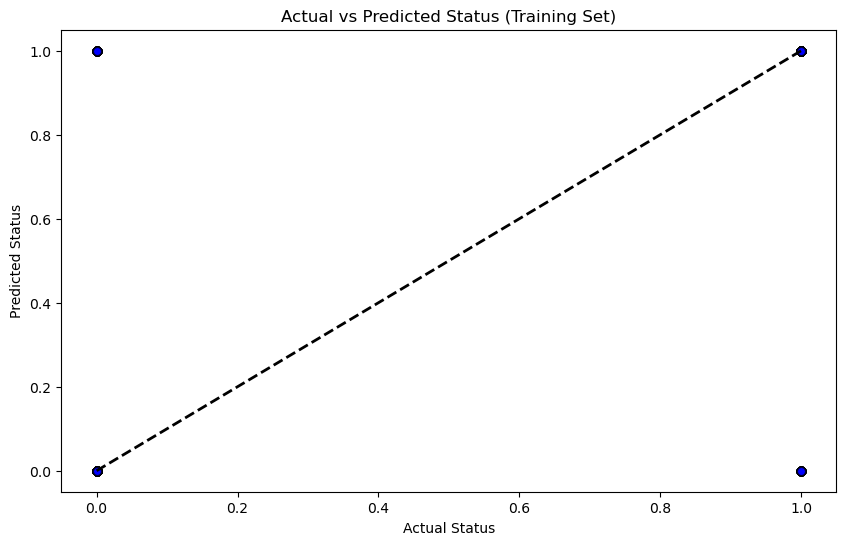

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Convert y_train to a NumPy array
y_train_array = np.array(y_train)

# Predict on the training data
y_train_pred = svm_model.predict(X_train_scaled)

# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_train_array, y_train_pred, color='blue', edgecolor='k', alpha=0.6)
plt.plot([y_train_array.min(), y_train_array.max()], [y_train_array.min(), y_train_array.max()], 'k--', lw=2)
plt.xlabel("Actual Status")
plt.ylabel("Predicted Status")
plt.title("Actual vs Predicted Status (Training Set)")
plt.show()

**Define Models and Hyperparameters**

In [57]:
from sklearn.model_selection import GridSearchCV

In [58]:
# Logistic Regression
# Define model and parameter grid for Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'saga']}

In [60]:
# Define model and parameter grid for KNN
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

In [61]:
# Define model and parameter grid for SVM
svm_model = SVC()
svm_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

**Hyperparameter Tuning and Cross-Validation**

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
# Logistic Regression
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5, n_jobs=-1)
logreg_grid_search.fit(X_train_scaled, y_train)
logreg_best_model = logreg_grid_search.best_estimator_

In [64]:
# KNN
knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5, n_jobs=-1)
knn_grid_search.fit(X_train_scaled, y_train)
knn_best_model = knn_grid_search.best_estimator_

In [65]:
# SVM
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train_scaled, y_train)
svm_best_model = svm_grid_search.best_estimator_

**Evaluate Model Hyperparameter Tuning and Cross-Validation**

In [66]:
# Logistic Regression Evaluation
logreg_predictions = logreg_best_model.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.45      0.48       153
           1       0.49      0.55      0.52       147

    accuracy                           0.50       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.50      0.50      0.50       300

Logistic Regression Accuracy: 0.5


In [67]:
# KNN Evaluation
knn_predictions = knn_best_model.predict(X_test_scaled)
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))
print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.45      0.47       153
           1       0.47      0.52      0.50       147

    accuracy                           0.48       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.48      0.48      0.48       300

KNN Accuracy: 0.48333333333333334


In [68]:
# SVM Evaluation
svm_predictions = svm_best_model.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48       153
           1       0.48      0.50      0.49       147

    accuracy                           0.49       300
   macro avg       0.49      0.49      0.49       300
weighted avg       0.49      0.49      0.49       300

SVM Accuracy: 0.4866666666666667


In [69]:
# Cross-validation scores for each model
logreg_cv_scores = cross_val_score(logreg_best_model, X_train_scaled, y_train, cv=5)
knn_cv_scores = cross_val_score(knn_best_model, X_train_scaled, y_train, cv=5)
svm_cv_scores = cross_val_score(svm_best_model, X_train_scaled, y_train, cv=5)

print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("KNN Cross-Validation Scores:", knn_cv_scores)
print("SVM Cross-Validation Scores:", svm_cv_scores)

Logistic Regression Cross-Validation Scores: [0.46428571 0.50714286 0.53571429 0.55       0.57857143]
KNN Cross-Validation Scores: [0.54285714 0.55714286 0.57857143 0.52142857 0.5       ]
SVM Cross-Validation Scores: [0.55714286 0.6        0.59285714 0.57142857 0.52142857]


**Model Visualization**

c:\Users\Aspire 3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Aspire 3\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


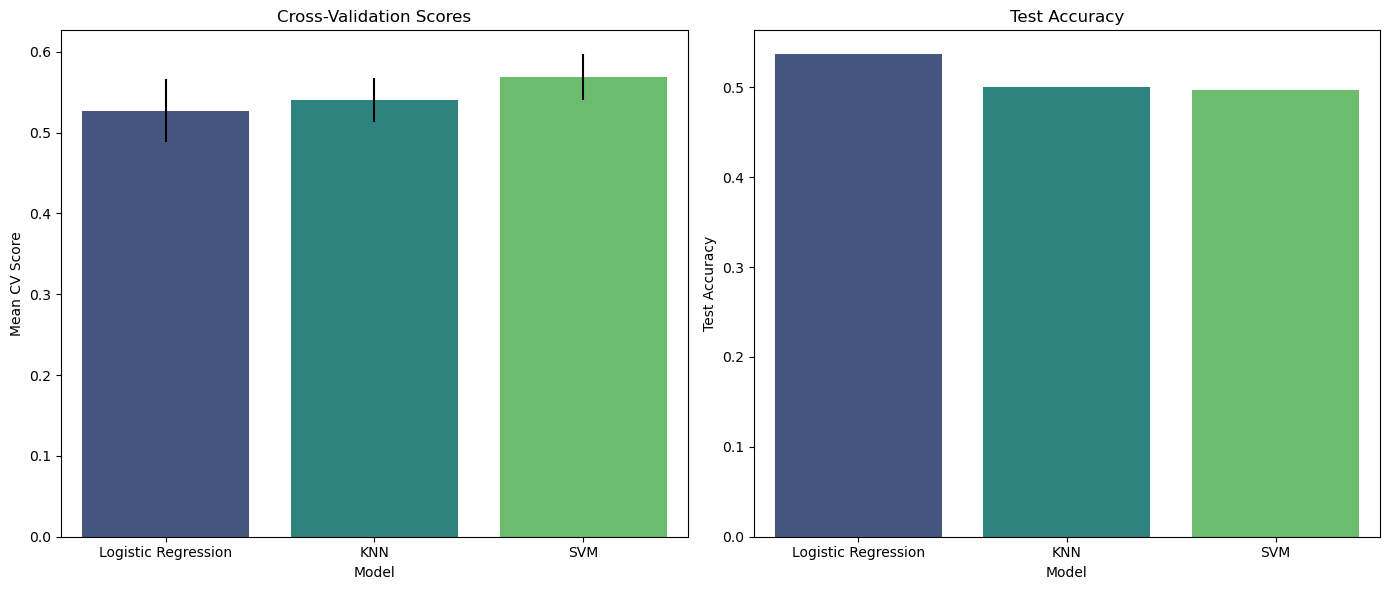

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cross-validation scores plot
models = ['Logistic Regression', 'KNN', 'SVM']
cv_scores_means = [np.mean(logreg_cv_scores), np.mean(knn_cv_scores), np.mean(svm_cv_scores)]
cv_scores_std = [np.std(logreg_cv_scores), np.std(knn_cv_scores), np.std(svm_cv_scores)]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=models, y=cv_scores_means, yerr=cv_scores_std, palette='viridis')
plt.title('Cross-Validation Scores')
plt.xlabel('Model')
plt.ylabel('Mean CV Score')

# Test accuracy plot
test_accuracies = [logreg_accuracy, knn_accuracy, svm_accuracy]

plt.subplot(1, 2, 2)
sns.barplot(x=models, y=test_accuracies, palette='viridis')
plt.title('Test Accuracy')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')

plt.tight_layout()
plt.show()


Model terbaik yang akan dipilih adalah model SVM, karena Model SVM memiliki performa terbaik dengan rata-rata cross-validation score tertinggi, yang menunjukkan bahwa hyperplane yang dipelajari SVM cenderung memisahkan kelas dengan lebih baik dibandingkan model lainnya.

**Simpan Model**

In [76]:
import pickle

# The best SVM model after hyperparameter tuning and cross-validation
best_svm_model = svm_best_model

# Define the filename for the saved model
filename = 'transaction_model.sav'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(best_svm_model, file)

print(f"Best SVM model saved as {filename}")


Best SVM model saved as transaction_model.sav
